In [1]:
import pipeline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sigmaclip

%matplotlib inline

# Sky background estimation

Sky images are taken by pointing the telescope away from bright objects and taking a picture. They are used to calibrate how bright the sky is overall, in order to subtract out this constant background from signal from the objects being observed.

In [2]:
skys = 95,99 # indices of sky images. these have 5 sec exposure x 6 coadds

img_loc = '2016jul14' # folder where the images are located

## Create master sky

In order to counteract the variation/noise between different images of the same sky (e.g. read noise, dark current variance, cosmic rays), multiple images are averaged to get the master sky. Then, because the sky image contains dark current, a master dark (with the same total integration time) is subtracted.

In [3]:
master_dark = np.load('master_dark.npy') # calculated in test.ipynb (just an average over multiple darks)

In [4]:
master = pipeline.average(img_loc, *skys)
master -= master_dark

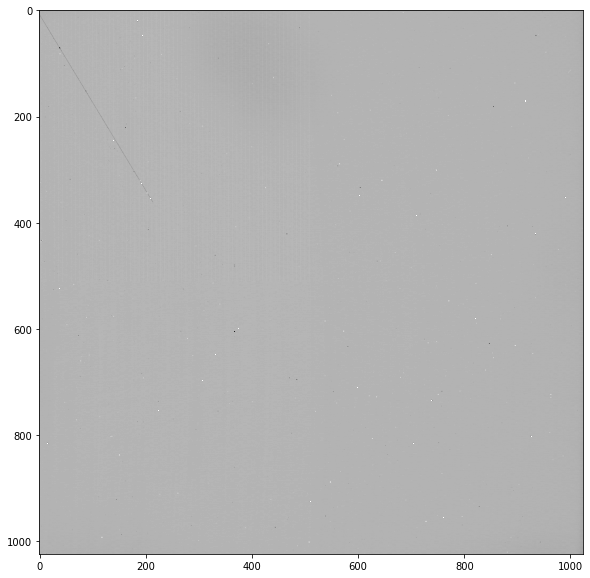

In [5]:
pipeline.plot_img(master)

## Clip outliers

As can be seen from the first histogram below (and somewhat from the image above), the master sky has a few very large outliers (due to noise and defects in the skys and/or the darks). I clip them before analysing.

Text(0, 0.5, 'count')

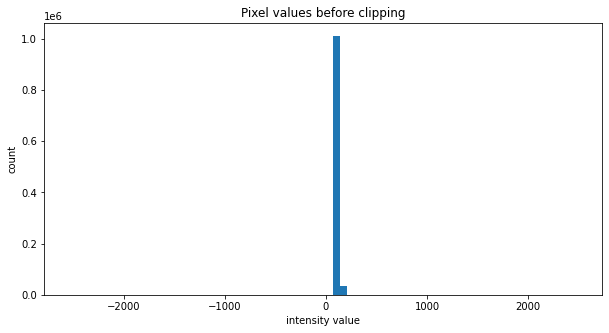

In [7]:
plt.figure(figsize=(10,5))
plt.hist(master.flatten(), bins=75)
plt.title('Pixel values before clipping')
plt.xlabel('intensity value')
plt.ylabel('count')

In [9]:
master_clipped, lower, upper = sigmaclip(master, low=5.0, high=5.0) # removes values over 5 SD away from the mean

Text(0, 0.5, 'count')

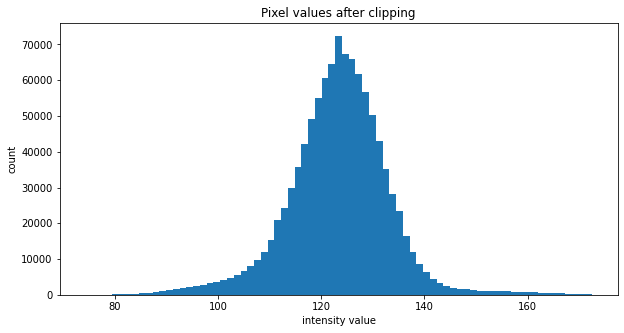

In [10]:
plt.figure(figsize=(10,5))
plt.hist(master_clipped, bins=75)
plt.title('Pixel values after clipping')
plt.xlabel('intensity value')
plt.ylabel('count')

The pixel intensity values are in units of DN, which converts to electrons by a gain of 4x. We then normalize by integration time to get the average estimate in units of electrons/sec/pixel.

In [11]:
average_sky_dn = np.mean(master_clipped)

gain = 4
int_time = 5*6 # total integration time = 5s exposure x 6 coadds
average_sky_e = (average_sky_dn * gain) / int_time

If the sky background was a Poisson process, it would have the same mean and variance. We see that this is almost the case:

In [12]:
np.mean(master_clipped), np.var(master_clipped)

(123.31968317664152, 97.03810169966883)

## Final result

In [13]:
print('Average sky background: ' + str(average_sky_e) + ' electrons per pixel per second.')

Average sky background: 16.442624423552203 electrons per pixel per second.
